# Lab2
## Aproximación de raices
- Método de bisección
- Método de Newton
- Método de punto fijo

## 0: Método para mostrar los resultados

Sabemos que los resultados de las distintas funciones que implementemos van a ser de la forma:
hx, hf - donde hx son los distintos x y hf los distintos f(x).

In [37]:
def show_results(hx, hf):
    print(f'Algorithm ran {len(hx)} iterations')
    print(f'Final results are x = {hx[-1]:.2f} and f(x) = {hf[-1]:.2f}')

## 1: Método de bisección

Escribir una función que implemente el método de bisección para hallar una raíz de $ f : R 􏰀→ R $ en el intervalo [a,b]. La función debe llamarse “rbisec”, y tener como entrada los argumentos `(fun,I,err,mit)`, donde fun es una función que dado x retorna f(x), I= [a,b] es un intervalo en R, err es la tolerancia deseada del error y mit es el número máximo de iteraciones permitidas.

El algoritmo debe finalizar en la k-esima iteración si $|f(xk)| < err$ o si $k ≥ mit$. Los argumentos de salida deben ser (hx,hf) donde hx= [x1, . . . , xN ] es una lista que representa el historial de puntos medios y hf= [f(x1),...,f(xN)] el historial de los respectivos valores funcionales.

In [128]:
def rbisec(fun, I, err, mit):
    a, b = I
    hm, hf = [], []
     
    for _ in range(mit):
        # get midpoint
        m = (a + b) / 2
        
        # save partial results
        hm.append(m); hf.append(fun(m))
        
        # check results using the abs error
        if (abs(fun(m)) < abs(err)):
            break
        
        # find the new interval
        if fun(a)*fun(m) < 0:
            b = m
        elif fun(b)*fun(m) < 0:
            a = m

    return hm, hf

Probamos con $ f(x) = 0 $

In [129]:
hx, hf = rbisec(lambda x: 0, [-100, 100], 0.1, 10)

show_results(hx, hf)

Algorithm ran 1 iterations
Final results are x = 0.00 and f(x) = 0.00


Probamos con $ f(x) = x^2 - x + 1 $, con raices en $ \sqrt{-1} y -(-1)^{2/3} $

In [147]:
hx, hf = rbisec(lambda x: x**2 - x - 1, [1, 2], pow(2, -26), 30)

show_results(hx, hf)

Algorithm ran 26 iterations
Final results are x = 1.62 and f(x) = 0.00


## 2: Probar método de Bisección
### a) $ tan(x) $
Encontrar la menor solución positiva de la ecuación $ 2x = tan(x) $ con un error menor a 10−5 en menos de 100 iteraciones.

¿Cuántas iteraciones son necesarias cuando comenzamos con el intervalo [0.8, 1.4]?

Usar la siguiente sintaxis:
```python
hx, hy = rbisec(fun_lab2ej2a, [0.8, 1.4], 1e-5, 100)
```

In [41]:
import math

fun_lab2ej2a = math.tan
hx, hf = rbisec(fun_lab2ej2a, [0.8, 1.4], 1e-5, 100)

show_results(hx, hf)

Algorithm ran 100 iterations
Final results are x = 1.10 and f(x) = 1.96


El algoritmo no puede encontrar una raiz en este intervalo ya que las raizes de $f(x) = tan(x)$ son:

<center>$ x = \pi * \mathcal{n} $ where $ \mathcal{n} \in \mathbb{Z} $</center>

y en este caso, no existen soluciones dentro del intervalo dado, ya que:

$$ 0\pi < 0.8 \land 1.4 < \pi $$

### b) $ \sqrt{3} $

Encontrar una aproximación a $ \sqrt{3} $ con un error menor a $ 10^{-5} $.

In [148]:
fun_lab2ej2b = lambda x: x**2 - 3
hx, hf = rbisec(fun_lab2ej2b, [0, 3], pow(10, -5), 20)

show_results(hx, hf)

Algorithm ran 18 iterations
Final results are x = 1.73 and f(x) = 0.00


In [44]:
# comparemos el resultado
hx[-1], math.sqrt(3)

(1.7320518493652344, 1.7320508075688772)

Casi . . .

### c) Gráficos del método de bisección

Graficar conjuntamente $ f $ y los pares $ (xk,f(xk)) $ para las dos funciones anteriores y con al menos dos intervalos iniciales distintos para cada una.


In [74]:
# plot tan
import matplotlib.pyplot as plt
import numpy as np

# function to plot
def plot_bisec(fun, I, err, mit, figsize=5):
    """
    Given a function, a list of intervals,
    an error and the max iterations allowed,
    for each interval given plots the
    real values of the function in the interval
    plots the used values by the bisection method
    to find the function's zero.
    Creates N plots where N is the amount of intervals.
    """

    # create the samples
    I_x = [np.linspace(*i, 1000) for i in I]
    
    # get the real values
    I_r = [np.array([
        fun(x) 
        for x in I_s
    ]) for I_s in I_x]
    
    # get our own results using bisec
    I_b = [
        rbisec(fun, i, err, mit)
        for i in I
    ]
    
    # create the fig and axes
    fig, ax = plt.subplots(1, len(I), figsize=(figsize*len(I), figsize))
    
    # for each ax
    for i, (ii, x, r, (hx, hf)) in enumerate(zip(I, I_x, I_r, I_b)):
        ax[i].set_title(f'I{i}: {ii}')
        
        # show the real results
        ax[i].plot(x, r, label='f(x)')
        
        # show the results using bisec
        bis_failed = not any(abs(f_x) < abs(err) for f_x in hf)
        # check if the bisc failed (not close enough to zero)
        if bis_failed:
            centerx = sum(ii)/2
            centery = ax[i].get_yticks()[3]
            print(centery)
            ax[i].text(centerx, 2, 'BISEC FAILED',
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='red')
        # bisec didn't failed, show results
        else:
            ax[i].plot(hx, hf, label='bisec(I)')

            # center the zero
            ax[i].spines['left'].set_position('center')
            ax[i].spines['bottom'].set_position('zero')
        
        ax[i].spines['right'].set_color('none')
        ax[i].spines['top'].set_color('none')

        ax[i].legend()
    
    plt.show()

#### Gráfico de $ f(x) = tan(x)$

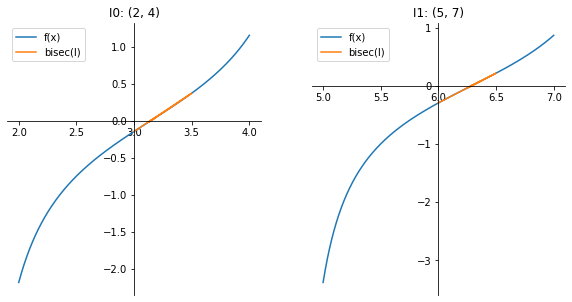

In [149]:
# define our intervals
I_0 = (2, 4)
I_1 = (5, 7)

# plot
plot_bisec(fun_lab2ej2a, [I_0, I_1], pow(10, -5), 100)

#### Gráfico de $ f(x) = x^2 - 3 $

400000.0


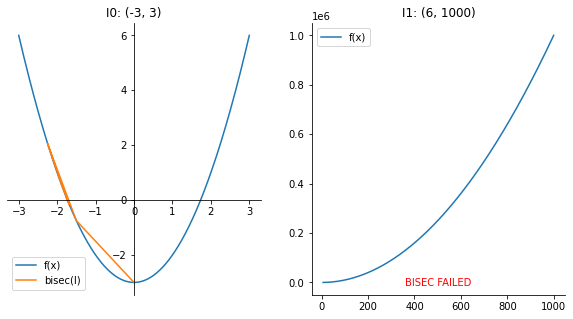

In [150]:
# define our intervals
I_0 = (-3, 3)
I_1 = (6, 1000)

# plot
plot_bisec(fun_lab2ej2b, [I_0, I_1], pow(10, -5), 100)

## 3: Método de Newton

Escribir una funci ́on que implemente el m ́etodo de Newton para hallar una ra ́ız de $f : R 􏰀→ R$ partiendo de un punto inicial x0. La funci ́on debe llamarse “rnewton”, y tener como entrada `(fun,x0,err,mit)` donde fun es una funci ́on que dado x retorna f(x) y f′(x), x0 es un punto inicial en R, err es la tolerancia deseada del error y mit es el nu ́me- ro m ́aximo de iteraciones permitidas. El algoritmo debe finalizar en la k-esima iteraci ́on si se cumple alguna de las siguientes condiciones:

$$ {|x_k − x_{k-1}| \over |x_k|} < err \\
|f(xk)| < err \\
k ≥ mit. $$

La salida debe ser (hx,hf) donde hx= [x1, . . . , xN ] es una lista que representa el hist ́ori- co de puntos generados y hf= [f(x1),...,f(xN)] el hist ́orico de los respectivos valores funcionales.

In [56]:
def rnewton(fun, x0, err, mit):
    x_k_p = 0
    x_k = x0
    hx, hf = [], []
     
    for _ in range(mit):
        # get partial results
        f_x, f_p_x = fun(x_k)
        hx.append(x_k), hf.append(f_x)
        
        # have we found the solution?
        if (abs(f_x) < abs(err)):
            break
            
        # my x_k is not significant
        # compared to my last x_k_p
        abs_x_k = abs(x_k - x_k_p)
        if x_k != 0 and (abs_x_k / abs(x_k) < abs(err)):
            break
        
        # avoid division by zero
        # either f is constant
        # or has a max / min point
        if (f_p_x == 0):
            break
        
        # compute next approximation
        x_k_p = x_k
        x_k = x_k - (f_x / f_p_x)

    return hx, hf

Probemos $ f(x) = x^2 $ con raices en $ x = 0 $.

In [151]:
fun = lambda x: (pow(x, 2), x*2)
hx, hf = rnewton(fun, 3, pow(10, -20), 100)

show_results(hx, hf)

Algorithm ran 36 iterations
Final results are x = 0.00 and f(x) = 0.00


$ f(x) = x^2 + x $ con raices en $ x = -4 $ y $ x = 0 $, aproximando desde -3 y 1.

In [155]:
fun = lambda x: (pow(x, 2) + 4*x, 2*x + 1)
hx, hf = rnewton(fun, -3, pow(10, -20), 100)

show_results(hx, hf)

Algorithm ran 44 iterations
Final results are x = -4.00 and f(x) = 0.00


In [156]:
hx, hf = rnewton(fun, 1, pow(10, -20), 100)

show_results(hx, hf)

Algorithm ran 47 iterations
Final results are x = -4.00 and f(x) = 0.00


Probamos con una aproximación correcta en la primer iteración

In [158]:
fun = lambda x: (0, 0)
hx, hf = rnewton(fun, 0, pow(10, -10), 100)

show_results(hx, hf)

Algorithm ran 1 iterations
Final results are x = 0.00 and f(x) = 0.00


Un ejemplo donde la función es constante y no vamos a poder encontrar la raiz.

In [159]:
fun = lambda x: (2, 0)
hx, hf = rnewton(fun, 0, pow(10, -10), 100)

show_results(hx, hf)

Algorithm ran 1 iterations
Final results are x = 0.00 and f(x) = 2.00


## 4: Encontrar $\sqrt[3]{a}$ por método de Newton

Escribir una función que, ingresando a > 0, retorne una aproximación de $\sqrt[3]{a} $.

La aproximación debe realizarse usando el método de Newton del ejercicio anterior para resolver $ x^3 − a = 0$ con un error menor a $10^{-6}$ mediante el uso de la función $ f(x)􏰀 = x^3 − a$.

In [152]:
def cubic_root(a):
    assert a > 0, 'a must be > 0'
    
    # define f(x) = x^3 - a,
    # his derivative
    # and the helper function
    f = lambda x: pow(x, 3) - a
    f_p = lambda x: 3 * pow(x, 2)
    fun = lambda x: (f(x), f_p(x))
    
    # get newton's approximation
    hx, hf = rnewton(fun, a, pow(10, -6), 100)
    
    print(f'Newton\'s approximation to {a}^(1/3) is {hx[-1]:.2f}')
    return hx[-1]

In [153]:
cubic_root(27)

Newton's approximation to 27^(1/3) is 3.00


3.000000001793672

## 5: Método de iteración de punto fijo

Escribir una función que implemente el método de punto fijo para hallar un punto fijo de $φ : R 􏰀→ R$, partiendo de un punto inicial $x_0$.

La función debe llamarse `ripf`, y tener como entrada `(fun, x0, err, mit)` donde `fun` es una función que dado x retorna $φ(x)$, `x0` es un punto en $\mathbb R$, `err` es la tolerancia deseada del error y `mit` es el número máximo de iteraciones permitidas.

El algoritmo debe finalizar en la k-ésima iteración si:

$$ |x_k - x_{k-1}| < err $$ ó $$ k \geq mit $$

In [ ]:
def ripf(fun, x0, err, mit):
    